# Prework

## 0.1 sizes相关的函数测试

In [17]:
# sizes_path = "/media/sdd_14T/translocation/HiC_default/chrom_yZSJ025.sizes"
sizes_path = "/media/sdd_14T/translocation/HiC_default/chrom_hg19.sizes"
sizes = pd.read_csv(sizes_path,sep='\t',header=None)
sizes

,0,1
0,chr1,249250621
1,chr2,243199373
2,chr3,198022430
3,chr4,191154276
4,chr5,180915260
5,chr6,171115067
6,chr7,159138663
7,chr8,146364022
8,chr9,141213431
9,chr10,135534747


In [19]:
def sizes2chrname(sizes):
    chrname = [sizes[0][i] for i in range(len(sizes))]
    return chrname
def sizes2MaxChrLen(sizes):
    return np.max(sizes[1])
def sizes2resUnit(sizes):
    return int(pow(10,len(str(int(np.max(sizes[1])/10000)))))
def num2res_sim(num):
    if (num/1000000>=1):
        return str(int(num/1000000))+'M'
    else:
        if (num/1000>=1):
            return str(int(num/1000))+'k'
def chrname_pre(chrname_i):
    if chrname_i.startswith('chr'):
        return ''
    else:
        return 'chr'
chrname = sizes2chrname(sizes)
chrname
sizes2MaxChrLen(sizes),sizes2resUnit(sizes),num2res_sim(sizes2resUnit(sizes)*5),sizes[0][1].startswith('chr')

(249250621, 100000, '500k', True)

# Input Test

## 1.1 hic2mat

In [4]:
from HiSTra.hicInput import hic2mat
######## path of Dell t7910 ###########
# input_test_path = "/media/sdd_14T/hic/Rao_K562_hg19_hicfile.allValidPairs.hic"
# input_control_path = "/media/sdd_14T/hic/Rao_IMR90_hg19_hicfile.allValidPairs.hic"
# output_path = "/media/sdd_14T/translocation/work_dir"
# sizes_path = "/media/sdd_14T/translocation/HiC_default/chrom_hg19.sizes"
# juice_path = "/media/sdd_14T/translocation/Code/HiSTra/juice/juicer_tools_2.09.00.jar"
######## path of ThinkStation #########
input_test_path = "/home/yangqian/storage/Bio/projects/yeast_hic_data/13-merge_hic/H6/H6.allValidPairs.hic"
input_control_path = "/home/yangqian/storage/Bio/projects/yeast_hic_data/13-merge_hic/025/025.allValidPairs.hic"
output_path = "/home/yangqian/storage/Bio/projects/yeast_hic_data/SV_out/"
sizes_path = "/home/yangqian/storage/Bio/projects/yeast_hic_data/chrom_yZSJ025.sizes"
juice_path = "/home/yangqian/storage/Bio/projects/HiSTra/juice/juicer_tools_2.09.00.jar"
sizes = pd.read_csv(sizes_path,sep='\t',header=None)
print(hic2mat(input_test_path,output_path,juice_path,sizes))
print(hic2mat(input_control_path,output_path,juice_path,sizes))

--------- The hic file path is /home/yangqian/storage/Bio/projects/yeast_hic_data/13-merge_hic/H6/H6.allValidPairs.hic. ---------
--------- We are dumpping H6 sample chromosome pairs ('chr1', 'chr1').
--------- Process is completed 0.0%... ---------
--------- We are dumpping H6 sample chromosome pairs ('chr2', 'chr2').
--------- Process is completed 11.764705882352942%... ---------
--------- We are dumpping H6 sample chromosome pairs ('chr3', 'chr3').
--------- Process is completed 22.794117647058822%... ---------
--------- We are dumpping H6 sample chromosome pairs ('chr4', 'chr4').
--------- Process is completed 33.088235294117645%... ---------
--------- We are dumpping H6 sample chromosome pairs ('chr5', 'chr5').
--------- Process is completed 42.64705882352941%... ---------
--------- We are dumpping H6 sample chromosome pairs ('chr6', 'chr6').
--------- Process is completed 51.470588235294116%... ---------
--------- We are dumpping H6 sample chromosome pairs ('chr7', 'chr7').
-----

## 1.2 cool2mat

In [ ]:
!conda --version
!/media/sdd_14T/translocation/Code/HiSTra/HiST -t /media/sdd_14T/mcool/Rao_K562_hg19.mcool -c /media/sdd_14T/mcool/Rao_IMR90_hg19.mcool -s /media/sdd_14T/translocation/HiC_default/chrom_hg19.sizes -o /media/sdd_14T/translocation/work_dir

# Sparse matrix deal test

## 2.1 Sparse matrix deal step

In [ ]:
import pandas as pd
import numpy as np
from HiSTra.SparseMatrixDeal import *
from HiSTra.utils import *
from datetime import *
test_path = "/home/yangqian/storage/Bio/projects/yeast_hic_data/SV_out/Matrix_from_hic/H6"
control_path = "/home/yangqian/storage/Bio/projects/yeast_hic_data/SV_out/Matrix_from_hic/025"
sizes_path = "/home/yangqian/storage/Bio/projects/yeast_hic_data/chrom_yZSJ025.sizes"
sizes = pd.read_csv(sizes_path,sep='\t',header=None)
start = datetime.now()
ratio500k,testDir_mat_aligned,controlDir_mat_aligned = downsample(test_path,control_path,0,sizes)
ratio100k,testDir_mat_aligned,controlDir_mat_aligned = downsample(test_path,control_path,1,sizes)
end = datetime.now()
print("--- Debug Test: Depth difference is big: \n",ratio500k,ratio100k)
print(f"--- --- Consuming time is: {end-start} --- ---")

# Signal Finder

## 3.1 Signal Finder step

In [1]:
import pandas as pd
import numpy as np
from HiSTra.SignalFinder import *

test_matrix_path = "/home/yangqian/storage/Bio/projects/yeast_hic_data/SV_out/Matrix_aligned/H6_downsample_for_025"
control_matrix_path = "/home/yangqian/storage/Bio/projects/yeast_hic_data/SV_out/Matrix_aligned/025"
result_path = "/home/yangqian/storage/Bio/projects/yeast_hic_data/SV_out/"
sizes_path = "/home/yangqian/storage/Bio/projects/yeast_hic_data/chrom_yZSJ025.sizes"
sizes = pd.read_csv(sizes_path,sep='\t',header=None)
SV_resultpath = signalFinder(result_path,test_matrix_path,control_matrix_path,sizes)
print(SV_resultpath)

------ Corresponding Eigen folder of H6_downsample_for_025 exists. ---
------ We have finished 136 pairs of interchromosomes in resolution 5k. ------
------ Corresponding Eigen folder of 025 exists. ---
------ We have finished 136 pairs of interchromosomes in resolution 5k. ------
------ Corresponding SV_result folder exists. ------
/home/yangqian/storage/Bio/projects/yeast_hic_data/SV_out/SV_result/H6_downsample_for_025


# BoxFinder and Plot

baselinechoose.png
H6_downsample_for_025_result_500k.csv
H6_downsample_for_025_result_500k_sorted.csv
H6_downsample_for_025_result_5k.csv
H6_downsample_for_025_result_5k_sorted.csv
pic
chr11_in_chr11_chr12.txt
--- continue ---
chr11_in_chr11_chr14.txt
--- continue ---
chr11_in_chr11_chr7.txt
--- continue ---
chr1_in_chr1_chr6.txt
--- continue ---
chr2_in_chr2_chr13.txt
--- continue ---
chr11_in_chr11_chr9.txt
--- continue ---
chr12_in_chr12_chr11.txt
--- continue ---
chr12_in_chr12_chr6.txt
--- continue ---
chr12_in_chr12_chr7.txt
--- continue ---
chr12_in_chr12_chr9.txt
--- continue ---
chr13_in_chr13_chr2.txt
--- continue ---
chr14_in_chr14_chr11.txt
--- continue ---
chr15_in_chr15_chr9.txt
--- continue ---
chr14_in_chr14_chr6.txt
--- continue ---
chr14_in_chr14_chr9.txt
--- continue ---
chr6_in_chr6_chr1.txt
--- continue ---
chr6_in_chr6_chr12.txt
--- continue ---
chr6_in_chr6_chr14.txt
--- continue ---
chr6_in_chr6_chr8.txt
--- continue ---
chr6_in_chr6_chr9.txt
--- continue ---
ch

NameError: name 'end3' is not defined

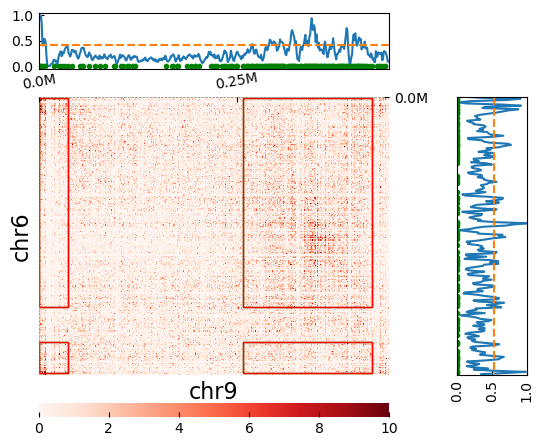

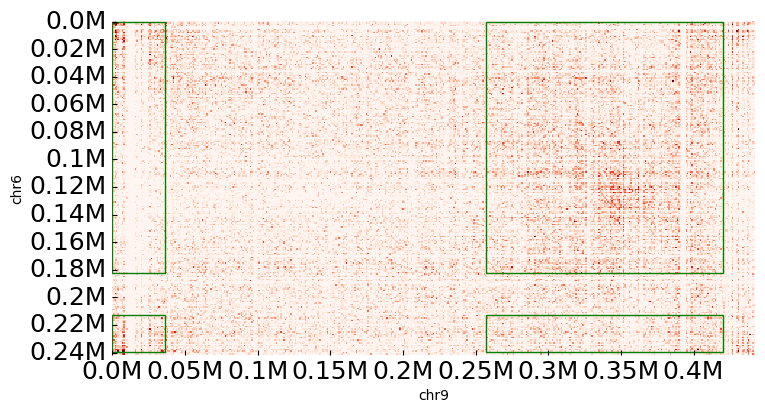

In [2]:
from HiSTra.BoxFinder import *
deDoc_path = '/home/yangqian/storage/Bio/projects/HiSTra/deDoc/deDoc.jar'    
testDir_mat_aligned = '/home/yangqian/storage/Bio/projects/yeast_hic_data/SV_out/Matrix_aligned/H6_downsample_for_025'
SV_resultpath = '/home/yangqian/storage/Bio/projects/yeast_hic_data/SV_out/SV_result/H6_downsample_for_025'
# sample_sort = pd.read_csv("/home/yangqian/storage/Bio/projects/yeast_hic_data/SV_out/SV_result/H6_downsample_for_025/H6_downsample_for_025_result_5k_sorted.csv")
# name_sample = 'H6_downsample_for_025'
# TLplotandBEDproduce(path,name_sample,sample_sort[0:10],1000)

for file in os.listdir(SV_resultpath):
    if fnmatch.fnmatch(file,'*sorted.csv'):
        sv_result_sort = pd.read_csv(os.path.join(SV_resultpath,file))
    print(file)
result_pick_len = deDoc_run(os.path.join(testDir_mat_aligned,'1k'), sv_result_sort, 0.4, deDoc_path, 1000)
path = os.path.dirname(testDir_mat_aligned)
sample_name = os.path.basename(testDir_mat_aligned)
TLplotandBEDproduce(path,sample_name,sv_result_sort[0:result_pick_len],1000)
# ----- time consumed print -------
end4 = datetime.now()
print(f"------ Translocation boxes are saved in {SV_resultpath}")
print(f"--- Step 4 finish. Translocation boxes are listed. Consuming {end4-end3}. ---")